## Reinforcement Learning 2: *Markov Decision Processes (MDPs)*

**Assignment:** hand-in before 16/02/2022

#### **1. Binary World**

*(5 x 1 points)*

Consider an environment that has only 2 states: $\mathcal{S} = \{A (good), B (bad)\}$. The agent can interact with the environment taking one of 2 possible actions:  $\mathcal{A} = \{x, y\}$:

- From state `A`, action `x` leads to `A` (60%) or `B` (40%); `y` leads to `A` (50%) or `B` (50%)
- From state `B`, action `x` leads to `A` (30%) or `B` (70%); `y` leads to `A` (80%) or `B` (20%)

**a)** Write two functions `action_x(s)` and `action_y(s)`, that take an input k (corresponding to the state `A` or `B`) and return the next state ($s'$, `A` or `B`), based on the state transitions.

In [ ]:
import numpy as np
def action_x(s):
  pAxA = 0.6 
  pAxB = 1 - pAxA
  pBxA = 0.3
  pBxB = 1- pBxA
  return [['A','B'][np.random.choice(2,p=[pAxA,pAxB])],['A','B'][np.random.choice(2,p=[pBxA,pBxB])]][{'A': 0,'B': 1}[s]]

def action_y(s):
  pAyA = 0.5 
  pAyB = 1- pAyA
  pByA = 0.8
  pByB = 1- pByA
  return [['A','B'][np.random.choice(2,p=[pAyA,pAyB])],['A','B'][np.random.choice(2,p=[pByA,pByB])]][{'A': 0,'B': 1}[s]]


**b)** Run a simulation starting in state `A` and repeating action `x` 100 times. For each time step you are in state A, give yourself +1 point. Find (and plot or print) the total reward value.

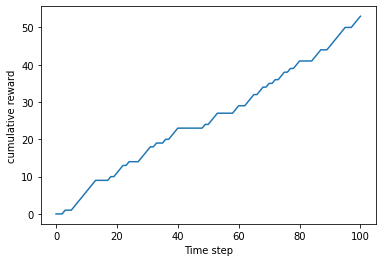

total reward: 53


In [ ]:
import matplotlib.pyplot as plt

def step_x(state):
  rewards = []
  time_step = list(range(101))
  old_state = state
  increment = {'A':1, 'B':0}
  for i in range (101):
    new_state = action_x(old_state)
    rewards.append([0,(rewards or [None])[-1] ][len(rewards)>0] + increment[new_state])
    old_state = new_state
  reward = rewards[-1]
  plt.plot(time_step,rewards)
  plt.xlabel("Time step")
  plt.ylabel("cumulative reward")
  plt.show()
  print("total reward: %d"%reward)

step_x('A')

**c)** Repeat b) using action `y` 100 times.

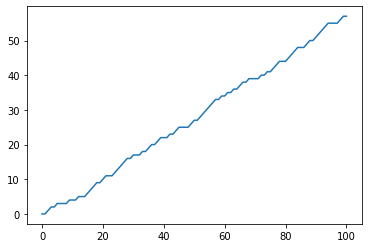

total reward: 57


In [ ]:
import matplotlib.pyplot as plt

def step_y(state):
  rewards = []
  actions = list(range(101))
  old_state = state
  increment = {'A':1, 'B':0}
  for i in range (101):
    new_state = action_y(old_state)
    rewards.append([0,(rewards or [None])[-1]][len(rewards)>0] + increment[new_state])
    old_state = new_state
  reward = rewards[-1]
  plt.plot(actions,rewards)
  plt.xlabel("Time step")
  plt.ylabel("cumulative reward")
  plt.show()
  print("total reward: %d" %reward)

step_y('A')

**d)** Repeat, alternating randomly between actions

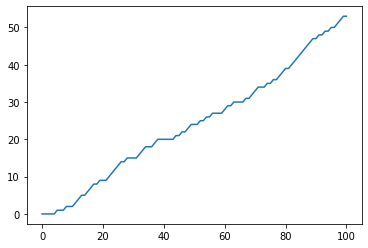

53

In [ ]:
def random_action(start_state):
  rewards = []
  actions = list(range(101))
  old_state = start_state
  new_state = start_state
  increment = {'A':1, 'B':0}
  for i in range(101):
    action = np.random.choice(2,p=[0.5,0.5])
    new_state = [action_x(old_state),action_y(old_state)][action]
    rewards.append([0,(rewards or [None])[-1]][len(rewards)>0] + increment[new_state])
  reward = rewards[-1]
  plt.plot(actions,rewards)
  plt.xlabel("Time step")
  plt.ylabel("cumulative reward")
  plt.show()
  return reward

random_action('A')

**e)** Compare the return obtained from each of these policies

Reward for action x for 100 runs is 47
Reward for action y for 100 runs is 64
Reward for any of the actions for 100 runs is 50.
Reward for action y is higher than for action x: we end up in state A more often which we actually call the 'Good' state. That is why the 100 runs for any of the action x or y yields a reward between 47 and 64.


---

## 2. Real-world scenarios

*(5 points)*

Considering the examples given in the lecture and in the tutorials, think about an example problem (try to keep it simple) that can be formulated as an MDP. Describe the problem completely: state and action spaces, rewards, dynamics. Draw a schematic description of the MDP (similar to the examples shown) and implement a simple `gym` environment for the MDP (including its dynamics). Sample from the MDP (taking random actions) for at least 100 steps and plot the cummulative reward.

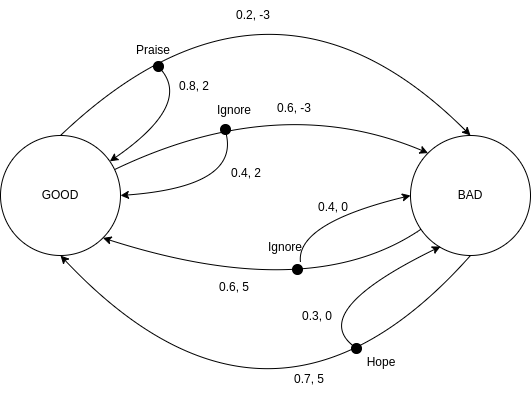

In [ ]:
import gym
from gym import spaces
import numpy as np
# This small example considers the possible states of weather: {Good, Bad}
# In case of good weather we can take the following actions: {Praise,Ignore}
# In case of bad weather we can take the following actions: {Hope, Ignore}
# Our example runs in a world where praising, ignoring and hope can  change the weather on the following day. 
# when we are in state Good : action praise leads to 80% Good, 20% bad. action Ignore leads to 40% good, 60% bad
# when we are in state Bad: action Hope leads to 70% Good, 30% bad. action Ignore leads to 40% bad, 60% good.
# Good weather from a previous state of good weather brings 2 reward
# Good weather from a previous state of bad weather brings 5 reward
# bad weather from a previous state of bad weather brings 0 reward
# bad weather from a previous state of good weather brings -3 reward

class WeatherEnv(gym.Env):
    """
    Weather custom environment, built with the gym interface
    """
    metadata= {'render.modes': ['human']}
    def _next_observation(self):
        return {'state': self.agent_pos}

    def __init__(self):
        super(WeatherEnv, self).__init__()
        # Here, we declare our initial configuration
        # Usually, this includes defining the action
        # and observation step
        self.observation_space = spaces.Discrete(2)
        self.action_space = spaces.Tuple((spaces.Discrete(2), spaces.Discrete(1)))
        self.agent_pos = np.random.randint(2)


    def step(self, action):
        # This function executes a one-step simulation
        # in our environment. Receives the desired action
        # the agent has taken as input

        # dictionary of functions that return [reward, next_state] transitions for each action
        state_0_transitions = {
            0: lambda: [[2,0],[-3,1]][np.random.choice(2,p=[0.8,0.2])],  # Good weather and praise: 80% for good weather -> 2 reward, next state(good)= 0 // 20% chance for bad weather -> -3 reward, next state (bad) = 1
            1: lambda: [[2,0],[-3,1]][np.random.choice(2,p=[0.6,0.4])],  # Good weather and Ignore: 40% for good weather -> 2 reward, next state(good)= 0 // 40% chance for bad weather -> -3 reward, next state (bad) = 1
        }

        state_1_transitions = {
            0: lambda: [[5,0],[0,1]][np.random.choice(2,p=[0.7,0.3])],  # Bad weather and Hope: 70% for good weather -> 5 reward, next state(good)= 0 // 30% chance for bad weather -> 0 reward, next state (bad) = 1
            1: lambda: [[5,0],[0,1]][np.random.choice(2,p=[0.4,0.6])],  # Bad weather and Ignore: 60% for good weather -> 5 reward, next state(good)= 0 // 60% chance for bad weather -> 0 reward, next state (bad) = 1
        }

        reward = None
        next_state = None
        if (self.agent_pos==0):
            # Agent is in Good weather. Use state 0 transitions
            reward, next_state = state_0_transitions[action]()
        else:
            # Agent is in Bad weather. Use state 1 transitions
            reward, next_state = state_1_transitions[action]()

        # Transition the agent to the next state
        self.agent_pos = next_state
        # Return the data as defined by the gym interface
        return self._next_observation(), reward, False, {}

    def reset(self):
        # Restarts the environment to a starting position.
        # Usually, changes in the environment will be undone,
        # and the environment is reseeded
        # Reset the agent's position
        self.agent_pos = np.random.randint(2)
        return self._next_observation()

    def render(self, mode='human'):
        # Display the environment in some way. The mode defines
        # in which way we desire to display it.
        if mode == 'human':
            pretty_print_state = {
                0: "Good Weather",
                1: "Bad Weather"
            }
            print('Current State: {}'.format(pretty_print_state[self.agent_pos]))
        else:
            raise NotImplementedError()

Current State: Bad Weather
Action taken: Hope for good weather in bad weather
Reward obtained: 5
Current State: Good Weather
Action taken: Praise the good weather
Reward obtained: 2
Current State: Good Weather
Action taken: Praise the good weather
Reward obtained: 2
Current State: Good Weather
Action taken: Praise the good weather
Reward obtained: -3
Current State: Bad Weather
Action taken: Hope for good weather in bad weather
Reward obtained: 5
Current State: Good Weather
Action taken: Praise the good weather
Reward obtained: 2
Current State: Good Weather
Action taken: Praise the good weather
Reward obtained: 2
Current State: Good Weather
Action taken: Praise the good weather
Reward obtained: 2
Current State: Good Weather
Action taken: Ignoring the good weather
Reward obtained: 2
Current State: Good Weather
Action taken: Ignoring the good weather
Reward obtained: 2
Current State: Good Weather
Action taken: Ignoring the good weather
Reward obtained: -3
Current State: Bad Weather
Action

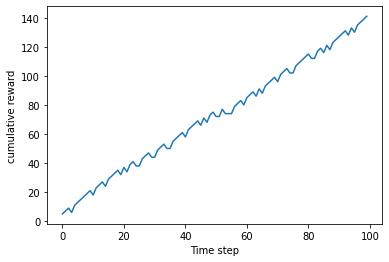

Total Reward : 141


In [ ]:
env = WeatherEnv()
curr_state = env.agent_pos
steps = 100
cumul_reward = []
actions = list (range (steps))

pretty_print_a_0 = {
    0: "Praise the good weather",
    1: "Ignoring the good weather",
}

pretty_print_a_1 = {
    0: "Hope for good weather in bad weather",
    1: "Ignore the bad weather",
}

for _ in range(steps):
    env.render()
    action = env.action_space[curr_state].sample() # Sample an action from the current state
    print_a = None
    if curr_state==0:
        print_a = pretty_print_a_0[action]
    else:
        print_a = pretty_print_a_1[action]
    print("Action taken: {}".format(print_a))
    obs, reward, _, _ = env.step(action) # Execute a step, get observation and reward
    curr_state = obs['state']
    cumul_reward.append([0,(cumul_reward or [None])[-1]][len(cumul_reward)>0] + reward)
    print("Reward obtained: {}".format(reward))
    print("===========================")
plt.plot(actions,cumul_reward)
plt.xlabel("Time step")
plt.ylabel("cumulative reward")
plt.show()
print ("Total Reward : {}" .format(cumul_reward[-1]) )